
<p style="font-size: 2.5em; text-align:center">COVID-19</p><br/>
<p style="font-size: 2.5em; text-align:center">Análisis datos</p><br/>
<center style="color:#aaa; margin-top:10px;"><b>Manuel López</b><br>Manuel.Lopez.ds@immune.institute</center>

# Objetivo

El objetivo es analizar los datos que tenemos disponibles de la pandemia y publicados en 'European Centre for Disease Prevention and Control' en la siguiente url:

https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19

Para descargar el fichero acceder a la url y clickar el formato elegido: excel, csv, json o xml. En nuestro caso en formato excel.

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Cargamos fichero Excel con el último dato disponible.

In [79]:
df=pd.read_excel('descarga.xlsx')

df.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0,"Epidemic intelligence, national weekly data"


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19772 entries, 0 to 19771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           19772 non-null  object 
 1   country_code      19136 non-null  object 
 2   continent         19772 non-null  object 
 3   population        19772 non-null  int64  
 4   indicator         19772 non-null  object 
 5   weekly_count      19772 non-null  int64  
 6   year_week         19772 non-null  object 
 7   rate_14_day       19334 non-null  float64
 8   cumulative_count  19772 non-null  int64  
 9   source            19772 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [81]:
df.describe()

,population,weekly_count,rate_14_day,cumulative_count
count,1.977200e+04,1.977200e+04,19334.000000,1.977200e+04
mean,8.354098e+07,9.558447e+03,43.466303,1.298737e+05
std,3.819492e+08,8.186472e+04,131.729386,1.149472e+06
min,8.090000e+02,-3.864000e+03,-132.596181,0.000000e+00
25%,1.324820e+06,0.000000e+00,0.061793,1.500000e+01
50%,8.544527e+06,2.100000e+01,2.758147,3.400000e+02
75%,3.236600e+07,4.690000e+02,23.980096,7.027750e+03
max,4.498460e+09,2.327003e+06,3448.992312,3.714480e+07


In [83]:
# eliminamos obs nan
df = df.dropna()

# eliminamos la columna source
df = df.drop(['source'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18710 entries, 1 to 19771
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           18710 non-null  object 
 1   country_code      18710 non-null  object 
 2   continent         18710 non-null  object 
 3   population        18710 non-null  int64  
 4   indicator         18710 non-null  object 
 5   weekly_count      18710 non-null  int64  
 6   year_week         18710 non-null  object 
 7   rate_14_day       18710 non-null  float64
 8   cumulative_count  18710 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [84]:
df.describe()

,population,weekly_count,rate_14_day,cumulative_count
count,1.871000e+04,1.871000e+04,18710.000000,1.871000e+04
mean,4.098535e+07,4.616580e+03,43.507397,6.389620e+04
std,1.529738e+08,3.797824e+04,132.819243,5.287606e+05
min,8.090000e+02,-3.864000e+03,-132.596181,0.000000e+00
25%,1.318442e+06,0.000000e+00,0.055533,1.800000e+01
50%,7.275556e+06,2.100000e+01,2.638709,3.440000e+02
75%,2.843594e+07,4.040000e+02,23.395910,6.191000e+03
max,1.439324e+09,1.588085e+06,3448.992312,2.064021e+07


* listamos valores negativos. Chequeando parece que son correcciones en el histórico por los países.

In [86]:
df[df['weekly_count'] < 0]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
2215,Benin,BEN,Africa,12123198,cases,-148,2020-21,-1.055827,191
5531,Ecuador,ECU,America,17643060,cases,-3864,2020-36,11.420921,109784
9655,Jersey,JEY,Europe,107796,cases,-4,2020-37,5.566069,380
9733,Jordan,JOR,Asia,10203140,cases,-50,2020-30,-0.107810,1168
10228,Kyrgyzstan,KGZ,Asia,6524191,deaths,-439,2020-34,-63.915971,1057
10861,Lithuania,LTU,Europe,2794184,cases,-28,2020-18,3.006244,1410
10984,Luxembourg,LUX,Europe,613894,cases,-1079,2020-35,-132.596181,6625
16825,Spain,ESP,Europe,46937060,deaths,-875,2020-21,1.917461,26834
18487,Uganda,UGA,Africa,45741000,cases,-15,2020-21,0.198946,212


* Seleccionamos la última semana de datos

In [87]:

wlast = df.year_week.drop_duplicates().iloc[-1]
df_last = df[df['year_week'] == wlast]
df_last.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
52,Afghanistan,AFG,Asia,38928341,cases,902,2020-53,7.439310,52909
105,Afghanistan,AFG,Asia,38928341,deaths,60,2020-53,3.801857,2230
255,Albania,ALB,Europe,2862427,cases,2866,2020-53,224.809227,59438
299,Albania,ALB,Europe,2862427,deaths,29,2020-53,36.682158,1193
352,Algeria,DZA,Africa,43851043,cases,1777,2020-53,11.869729,100408


* Vemos la incidencia por Continente para la ultima semana.

In [88]:

df_last.groupby(['continent','indicator']).aggregate({"rate_14_day": ['mean'],
                                       "weekly_count":'sum',
                                       "cumulative_count":'sum'})

rate_14_day weekly_count cumulative_count
                           mean          sum              sum
continent indicator                                          
Africa    cases       30.903383       158366          2832753
          deaths       6.173585         4084            67277
America   cases      151.393762      2072707         37144796
          deaths      19.491434        32304           881142
Asia      cases       75.243062       426554         18099566
          deaths       6.663287         6454           311534
Europe    cases      492.319605      1546543         26399030
          deaths      85.439296        31470           584454
Oceania   cases       29.637319         1042            55974
          deaths       4.747734            9             1184

* Listamos los 10 países con mayor numero de casos.

In [89]:
df_last[df_last['indicator'] == 'cases'].sort_values(by=['weekly_count'], ascending=False).head(10)
                

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
18912,United States,USA,America,331002647,cases,1488563,2020-53,844.517416,20640214
18806,United Kingdom,GBR,Europe,66647112,cases,325049,2020-53,922.218505,2654779
2840,Brazil,BRA,America,212559409,cases,249461,2020-53,221.174401,7733746
15006,Russia,RUS,Europe,145934460,cases,182103,2020-53,340.885902,3260138
8664,India,IND,Asia,1380004385,cases,132598,2020-53,20.645514,10340469
7244,Germany,DEU,Europe,83019213,cases,123679,2020-53,319.035788,1775513
9384,Italy,ITA,Europe,60359546,cases,107750,2020-53,335.093640,2155446
6862,France,FRA,Europe,67012883,cases,93082,2020-53,272.147670,2655728
16521,South Africa,ZAF,Africa,59308690,cases,88877,2020-53,301.517366,1100748
18352,Turkey,TUR,Europe,82003882,cases,84457,2020-53,277.730754,1417697


* listamos los paises con mayor numero de muertes en la ultima semana

In [90]:
df_last[df_last['indicator'] == 'deaths'].sort_values(by=['weekly_count'], ascending=False).head(10)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
18965,United States,USA,America,331002647,deaths,18264,2020-53,102.476522,351590
2893,Brazil,BRA,America,212559409,deaths,4879,2020-53,41.056757,196018
7297,Germany,DEU,Europe,83019213,deaths,4448,2020-53,99.964812,34574
11879,Mexico,MEX,America,128932753,deaths,4358,2020-53,66.817777,127213
18859,United Kingdom,GBR,Europe,66647112,deaths,3915,2020-53,114.378550,75024
15059,Russia,RUS,Europe,145934460,deaths,3723,2020-53,67.406972,58988
9437,Italy,ITA,Europe,60359546,deaths,3407,2020-53,108.234744,75332
16565,South Africa,ZAF,Africa,59308690,deaths,2506,2020-53,82.382531,29577
14571,Poland,POL,Europe,37972812,deaths,2014,2020-53,99.123552,29161
6915,France,FRA,Europe,67012883,deaths,1928,2020-53,66.972197,65037


* Vemos en lo que va de pandemia los países más afectados, que indice de letalidad tienen y cual es el % de su población infectada.

In [91]:
df_c = df[df['indicator'] == 'cases'].groupby('country').agg(
            Region = ('continent','last'),
            cases_cum = ('weekly_count','sum'),
            popul = ('population','last'),
            C14_100K = ('rate_14_day','last'))

df_d = df[df['indicator'] == 'deaths'].groupby('country').agg(
            Region = ('continent','last'),
            deaths_cum = ('weekly_count','sum'))

df_f = df_c.merge(df_d, how='inner', on=['Region','country'])

df_f['letalidad'] = df_f.deaths_cum / df_f.cases_cum *100

df_f['p_popul_inf'] = df_f.cases_cum / df_f.popul * 100

df_f.sort_values(by=['cases_cum'], ascending=False).head(10)


,Region,cases_cum,popul,C14_100K,deaths_cum,letalidad,p_popul_inf
country,,,,,,,
United States,America,20640214,331002647,844.517416,351590,1.703422,6.235664
India,Asia,10340469,1380004385,20.645514,149649,1.447217,0.749307
Brazil,America,7733746,212559409,221.174401,196018,2.534580,3.638393
Russia,Europe,3260138,145934460,340.885902,58988,1.809371,2.233974
France,Europe,2655728,67012883,272.147670,65037,2.448933,3.963011
United Kingdom,Europe,2654779,66647112,922.218505,75024,2.825998,3.983337
Italy,Europe,2155446,60359546,335.093640,75332,3.494961,3.571011
Spain,Europe,1958844,46937060,297.408913,51078,2.607558,4.173342
Germany,Europe,1775513,83019213,319.035788,34574,1.947268,2.138677


* Graficamos el indice de 14 días por 100K junto con las muertes para los 5 países más infectados mas Spain

In [92]:
df_c5 = df_f.nlargest(15,'cases_cum')
df_c5.head()

df_c5_ini = df.merge(df_c5,how='inner',on='country')
display(df_c5_ini.country.unique())
df_c5_ini = df_c5_ini.sort_values(['country','year_week'],ascending=['True','True'])
df_c5_ini.set_index('year_week',inplace=True)
df_c5_ini.head()

array(['Argentina', 'Brazil', 'Colombia', 'France', 'Germany', 'India',
       'Iran', 'Italy', 'Mexico', 'Poland', 'Russia', 'Spain', 'Turkey',
       'United Kingdom', 'United States'], dtype=object)

,country,country_code,continent,population,indicator,weekly_count,rate_14_day,cumulative_count,Region,cases_cum,popul,C14_100K,deaths_cum,letalidad,p_popul_inf
year_week,,,,,,,,,,,,,,,
2020-11,Argentina,ARG,America,45195777,cases,44,0.123905,56,America,1640693,45195777,207.076869,43481,2.650161,3.630191
2020-11,Argentina,ARG,America,45195777,deaths,1,0.044252,2,America,1640693,45195777,207.076869,43481,2.650161,3.630191
2020-12,Argentina,ARG,America,45195777,cases,210,0.561999,266,America,1640693,45195777,207.076869,43481,2.650161,3.630191
2020-12,Argentina,ARG,America,45195777,deaths,2,0.066378,4,America,1640693,45195777,207.076869,43481,2.650161,3.630191
2020-13,Argentina,ARG,America,45195777,cases,554,1.690423,820,America,1640693,45195777,207.076869,43481,2.650161,3.630191


,sum,mean
,weekly_count,weekly_count
indicator,,
cases,20640214,396927.192308
deaths,351590,6761.346154


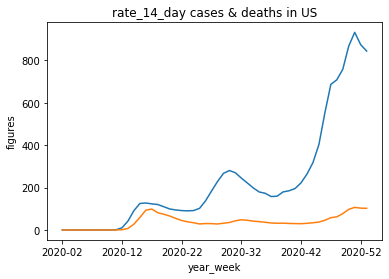

In [106]:
df_c5_ini.query("country=='United States' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='United States' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in US');

df_c5_ini.query("country=='United States'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

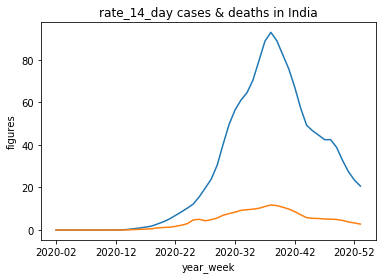

In [94]:
df_c5_ini.query("country=='India' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='India' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in India');

df_c5_ini.query("country=='India'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

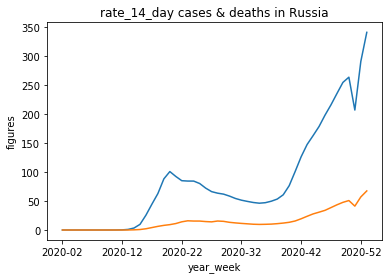

In [95]:
df_c5_ini.query("country=='Russia' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Russia' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Russia');

df_c5_ini.query("country=='Russia'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

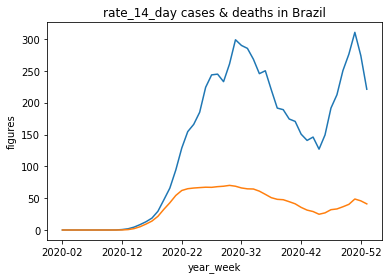

In [96]:
df_c5_ini.query("country=='Brazil' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Brazil' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Brazil');

df_c5_ini.query("country=='Brazil'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

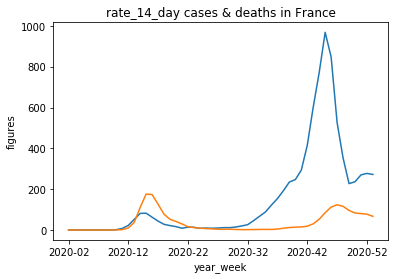

In [97]:
df_c5_ini.query("country=='France' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='France' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in France');

df_c5_ini.query("country=='France'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,1958844,37670.076923
deaths,51078,982.269231


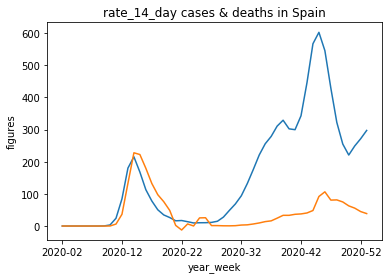

In [107]:
df_c5_ini.query("country=='Spain' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Spain' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Spain');

df_c5_ini.query("country=='Spain'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])